In [3]:
# Cell 1: imports + load dataset
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display first 5 rows
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Cell 2: data types and missing values
df.info()
print("\nMissing values per column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   sepal length (cm)  150 non-null    float64 
 1   sepal width (cm)   150 non-null    float64 
 2   petal length (cm)  150 non-null    float64 
 3   petal width (cm)   150 non-null    float64 
 4   species            150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB

Missing values per column:
 sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64


In [12]:
# Cell 3: summary statistics + group means
display(df.describe())

group_mean = df.groupby('species', observed=False).mean()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


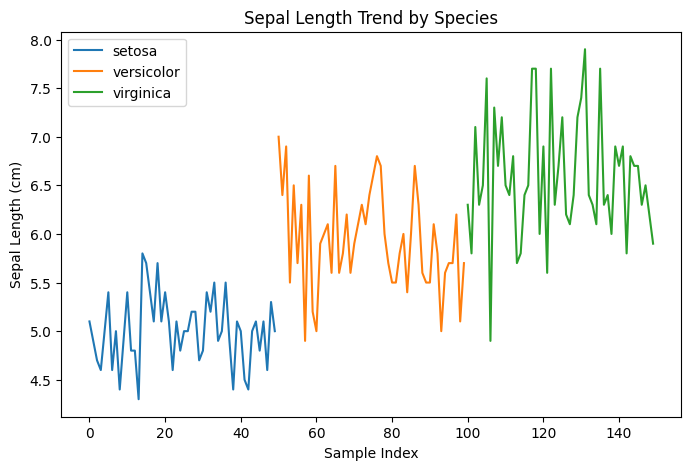

In [6]:
# Cell 4: line chart
plt.figure(figsize=(8,5))
for species in df['species'].unique():
    subset = df[df['species'] == species]
    plt.plot(subset.index, subset['sepal length (cm)'], label=species)
plt.title("Sepal Length Trend by Species")
plt.xlabel("Sample Index")
plt.ylabel("Sepal Length (cm)")
plt.legend()
plt.show()


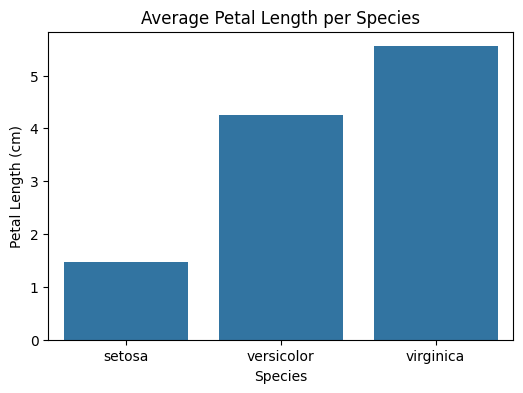

In [7]:
# Cell 5: bar chart
plt.figure(figsize=(6,4))
sns.barplot(x=group_mean.index, y=group_mean['petal length (cm)'])
plt.title("Average Petal Length per Species")
plt.xlabel("Species")
plt.ylabel("Petal Length (cm)")
plt.show()


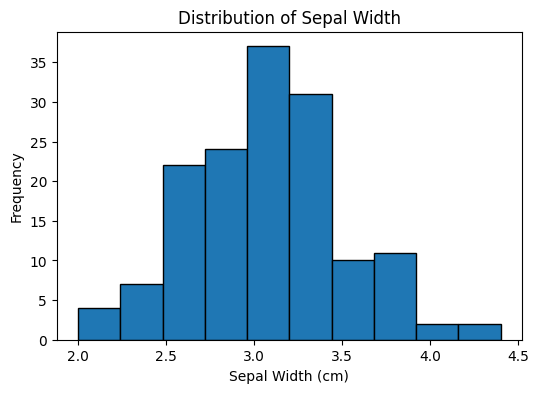

In [8]:
# Cell 6: histogram
plt.figure(figsize=(6,4))
plt.hist(df['sepal width (cm)'], bins=10, edgecolor='black')
plt.title("Distribution of Sepal Width")
plt.xlabel("Sepal Width (cm)")
plt.ylabel("Frequency")
plt.show()


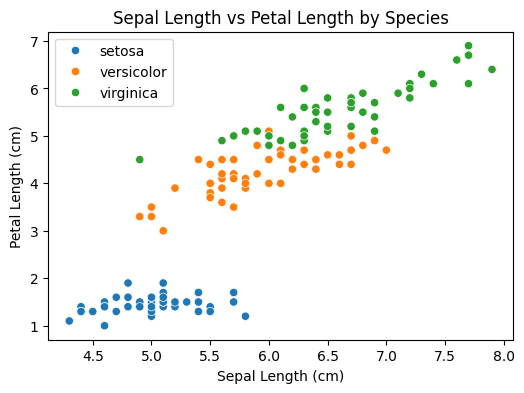

In [9]:
# Cell 7: scatter plot
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species')
plt.title("Sepal Length vs Petal Length by Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.legend()
plt.show()


### Observations
- No missing values were found in the dataset.  
- Setosa has much smaller petals than the other species.  
- Petal dimensions separate species more clearly than sepal dimensions.  
- The scatter plot shows distinct clusters — good for classification tasks.  
